# Travel Destination Recommendation System Notebook

#### Authors
* 1 Dennis Mwanzia
* 2 Pamela Owino
* 3 Joshua Rwanda
* 4 Nelson Kemboi
* 5 Pauline Wambui
* 6 Kane Muendo
* 7 Ian Macharia


## Problem Statement

Tourists visiting Africa often struggle to find suitable travel destinations that align with their preferences, making it challenging to plan a satisfying trip within their budget and time constraints. 

Our main aim as AfricuraAI is to develop a machine learning model i.e. recommendation system that provides personalized recommendations for the best tourist destinations in Africa. By considering customer reviews, budget constraints, specific locations, available amenities, and residence type, the model aims to suggest the ideal tourist destination that aligns with the user's preferences.

By analyzing the text reviews along with the additional factors available in the dataset, the project seeks to build a model that accurately predicts the preferred tourist destination for both new and existing users. The model will take into account factors such as customer reviews, budget limitations, location preferences, amenities, physical attractions, and residence type to recommend the most suitable tourist destination in Africa.

The value of this project lies in its ability to address the real-world problem of providing personalized recommendations for tourists in their search for the best tourist destinations in Africa. By utilizing machine learning algorithms and analyzing a range of factors, the project aims to enhance the travel experience for users by suggesting destinations that meet their preferences and requirements.

## Objectives

The goal is to build a machine learning model that can accurately predict hotel ratings based on customer reviews, budget constraints, specific locations, and the type of residence. By analyzing the text reviews and incorporating additional factors, such as sentiment analysis, budget range, geographical distance, and residence type, the objective is to develop a robust model that can make accurate predictions for new, unseen hotels. The model will help users make informed decisions when selecting hotels by considering their preferences and constraints.

#### Specifics

> To create a Recommendation system that can be used to suggest travel destinations based on budget.

> To identify top destinations in Africa

> To foster customer loyalty and repeat customers, building long term relationships between customers and travel destinations. 

> To increase customer engagement  and satisfaction by providing comprehensive and accurate information about tourist destinations.

> To generate revenue by engaging travel destinations to have them listed on the site.

> To collect user information and feedback to improve the recommendations in the long run.

## Data Understanding

In [1]:
# Importing necessary libraries
import pandas as pd
import json
import glob
import re


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from surprise import Dataset, Reader, KNNBasic, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

import warnings

# Ignore future deprecation warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set_style('darkgrid')

In [2]:
#func to read json files
def read_json_files(json_files):
    dfs = []
    for file in json_files:
        with open(file) as f:
            json_data = json.load(f)
            df = pd.DataFrame(json_data)
            dfs.append(df)

    merged_df = pd.concat(dfs, ignore_index=True)
    return merged_df


In [3]:
json_files = json_files = ['Data/botswana.json', 'Data/capeverde.json', 'Data/drc.json', 'Data/egypt.json',
                           'Data/ethiopia.json', 'Data/ghana.json', 'Data/kenya.json','Data/madagascar.json',
                           'Data/malawi.json', 'Data/morocco.json', 'Data/namibia.json', 'Data/nigeria.json',
                           'Data/rwanda.json','Data/senegal.json', 'Data/seychelles.json', 'Data/south_africa.json',
                           'Data/tanzania.json', 'Data/uganda.json', 'Data/zambia.json']
df = read_json_files(json_files)
df.head()

id        type    category         subcategories  \
0  1171922  ATTRACTION  attraction  [Sights & Landmarks]   
1  2513264  ATTRACTION  attraction      [Nature & Parks]   
2  3247057  ATTRACTION  attraction  [Sights & Landmarks]   
3   478934  ATTRACTION  attraction      [Nature & Parks]   
4  7931216  ATTRACTION  attraction      [Nature & Parks]   

                    name                            locationString  \
0     Khwai River Bridge       Okavango Delta, North-West District   
1  Gaborone Game Reserve             Gaborone, South-East District   
2        ISKCON Gaborone             Gaborone, South-East District   
3      Serondela Reserve  Chobe National Park, North-West District   
4    Khutse Game Reserve             Gaborone, South-East District   

                                         description  \
0                                               None   
1                                               None   
2                                               None   
3  This region of Chobe National Park is known as...   
4                                               None   

                                               image  photoCount awards  ...  \
0  https://media-cdn.tripadvisor.com/media/photo-...          24     []  ...   
1  https://media-cdn.tripadvisor.com/media/photo-...          84     []  ...   
2  https://media-cdn.tripadvisor.com/media/photo-...          21     []  ...   
3  https://media-cdn.tripadvisor.com/media/photo-...          65     []  ...   
4  https://media-cdn.tripadvisor.com/media/photo-...          26     []  ...   

   menuWebUrl  establishmentTypes  ownersTopReasons guideFeaturedInCopy  \
0         NaN                 NaN               NaN                 NaN   
1         NaN                 NaN               NaN                 NaN   
2         NaN                 NaN               NaN                 NaN   
3         NaN                 NaN               NaN                 NaN   
4         NaN                 NaN               NaN                 NaN   

  rentalDescriptions photos bedroomInfo bathroomInfo bathCount  baseDailyRate  
0                NaN    NaN         NaN          NaN       NaN            NaN  
1                NaN    NaN         NaN          NaN       NaN            NaN  
2                NaN    NaN         NaN          NaN       NaN            NaN  
3                NaN    NaN         NaN          NaN       NaN            NaN  
4                NaN    NaN         NaN          NaN       NaN            NaN  

[5 rows x 65 columns]

In [4]:
#read review data
reviews = pd.read_csv(r"Data/reviews_data.csv", index_col=0)
reviews

id                                                url  \
0      863480416  https://www.tripadvisor.com/ShowUserReviews-g2...   
1      856328161  https://www.tripadvisor.com/ShowUserReviews-g2...   
2      847451595  https://www.tripadvisor.com/ShowUserReviews-g2...   
3      731343195  https://www.tripadvisor.com/ShowUserReviews-g2...   
4      720927932  https://www.tripadvisor.com/ShowUserReviews-g2...   
...          ...                                                ...   
78681  157601077  https://www.tripadvisor.com/ShowUserReviews-g7...   
78682  135682898  https://www.tripadvisor.com/ShowUserReviews-g7...   
78683  129461615  https://www.tripadvisor.com/ShowUserReviews-g7...   
78684  331367989  https://www.tripadvisor.com/ShowUserReviews-g7...   
78685  225304903  https://www.tripadvisor.com/ShowUserReviews-g7...   

                                                   title lang  locationId  \
0                                               Must See   en     2189822   
1                                             Great tour   en     2189822   
2                    zoo for conserved animals and birds   en     2189822   
3      Great place to see some of the smaller wildlif...   en     2189822   
4                       Worth it just to play with Badgy   en     2189822   
...                                                  ...  ...         ...   
78681                        Ideal for quiet relaxation.   en     2720312   
78682  Eriijukiro - the wonderful Cultural Centre at ...   en     2720312   
78683              A very pleasant stop outside Mbarara!   en     2720312   
78684                                             Igongo   tr     2720312   
78685                                       Interessante   it     2720312   

                   publishedDate publishedPlatform  rating  helpfulVotes  \
0      2022-10-06T20:13:49-04:00           Desktop       5             0   
1      2022-08-25T06:53:49-04:00           Desktop       5             0   
2      2022-07-11T23:28:07-04:00           Desktop       4             0   
3      2019-12-08T03:54:09-05:00           Desktop       5             0   
4      2019-10-24T03:50:09-04:00            Mobile       5             1   
...                          ...               ...     ...           ...   
78681  2013-04-13T07:01:47-04:00           Desktop       5             1   
78682  2012-07-29T05:01:29-04:00           Desktop       5             3   
78683  2012-05-06T08:45:16-04:00           Desktop       4             3   
78684  2015-12-08T00:45:50-05:00           Desktop       4             2   
78685  2014-08-29T10:38:25-04:00           Desktop       3             1   

      travelDate                                               text  \
0        2022-09  Gee is a passionate tour guide. The  animals a...   
1        2022-08  Lots to see. Easy to get to from the Safari Lo...   
2        2022-07  a kind of a zoo for injured and saved animals ...   
3        2019-11  They do great rehabilitating injured animals. ...   
4        2019-10  We took the guided tour from Isaac, who was gr...   
...          ...                                                ...   
78681    2013-04  Nothing I disliked.\nStopped her for an excell...   
78682    2012-07  For travellers to the south west of Uganda, th...   
78683    2012-04  Located just a few miles outside Mbarara and h...   
78684    2015-11  Çok kaliteli ve temiz bir tesis . Yemekleri ço...   
78685    2014-08  Siamo stati all'Igongo Cultural Centre per pra...   

                                                    user ownerResponse  \
0      {'userId': 'A87669AAD9DA05FFBD46F1334B329FFD',...           NaN   
1      {'userId': '9FFED7DDC68883BBB8F4024333970E9A',...           NaN   
2      {'userId': 'B5E56A483B579518DDD82A3DA0E94487',...           NaN   
3      {'userId': '882D0A6C7152105BB0D83C84F3CB160D',...           NaN   
4      {'userId': '203EBC7F3F51AAAA39A87D2E58842C76',...           NaN   
...                       

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35836 entries, 0 to 35835
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     35836 non-null  object 
 1   type                   35836 non-null  object 
 2   category               35836 non-null  object 
 3   subcategories          34497 non-null  object 
 4   name                   35836 non-null  object 
 5   locationString         34497 non-null  object 
 6   description            20129 non-null  object 
 7   image                  28495 non-null  object 
 8   photoCount             35836 non-null  int64  
 9   awards                 34497 non-null  object 
 10  rankingPosition        26570 non-null  float64
 11  rating                 26706 non-null  float64
 12  rawRanking             26570 non-null  float64
 13  phone                  24666 non-null  object 
 14  address                34494 non-null  object 
 15  ad

In [6]:
#prnt columns
df.columns

Index(['id', 'type', 'category', 'subcategories', 'name', 'locationString',
       'description', 'image', 'photoCount', 'awards', 'rankingPosition',
       'rating', 'rawRanking', 'phone', 'address', 'addressObj', 'localName',
       'localAddress', 'email', 'latitude', 'longitude', 'webUrl', 'website',
       'rankingString', 'rankingDenominator', 'neighborhoodLocations',
       'nearestMetroStations', 'ancestorLocations', 'ratingHistogram',
       'numberOfReviews', 'reviewTags', 'reviews', 'booking', 'offerGroup',
       'subtype', 'hotelClass', 'amenities', 'numberOfRooms', 'priceLevel',
       'priceRange', 'roomTips', 'checkInDate', 'checkOutDate', 'offers',
       'hotelClassAttribution', 'localLangCode', 'isClosed', 'isLongClosed',
       'openNowText', 'cuisines', 'mealTypes', 'dishes', 'features',
       'dietaryRestrictions', 'hours', 'menuWebUrl', 'establishmentTypes',
       'ownersTopReasons', 'guideFeaturedInCopy', 'rentalDescriptions',
       'photos', 'bedroomInfo', '

### Data Cleaning

Steps to start cleaning the data:

* Data Understanding: Take some time to understand the data and its structure. Identify the columns or attributes that are relevant for your analysis or purposes.

* Remove Irrelevant Data: If there are any columns or attributes that are not useful for your analysis, you can remove them from the dataset.

* Handle Missing Values: Check for missing values in the dataset and decide how to handle them. You can either remove rows with missing values, replace them with appropriate values (e.g., mean, median, mode), or use advanced techniques like imputation based on the available data.

* Standardize Formats: Check for inconsistencies in the data formats. For example, ensure that dates, addresses, or numerical values are consistently formatted across the dataset.

* Remove Duplicates: Identify and remove any duplicate entries in the dataset to avoid redundancy and maintain data integrity.

* Handle Outliers: Examine the numerical values in the dataset for any outliers. Depending on the nature of the data, you can either remove outliers if they are erroneous or handle them appropriately (e.g., by capping or transforming the values).

* Text Cleaning: If you have text data, apply text cleaning techniques to remove unwanted characters, symbols, or special characters. This can include removing punctuation, converting text to lowercase, removing stopwords, and handling any language-specific nuances.

* Normalize and Categorize Data: If there are attributes that can be normalized or categorized, apply appropriate techniques to make the data consistent and easier to analyze. This could involve scaling numerical values, creating bins for continuous variables, or encoding categorical variables.

* Validate Data Integrity: Perform a final check to ensure the integrity of the cleaned data. Validate that all required fields are populated correctly, and the data is in the expected format.

#### Removing Irrelevant columns
There are several columns and attributes that are not useful for our analysis. These include **`image`**, **`photoCount`**, **`awards`**, **`phone`**, **`address`** , **`email`** **`webUrl`**, **`website`** **`neighborhoodLocations`**, **`nearestMetroStations`**, **`bookin`**, **`offerGroup`**, **`subtype`**, **`hotelClass`**, **`roomTips`**, **`checkInDate`**, **`checkOutDate`**, **`offers`**, **`hotelClassAttribution`**, **`localLangCode`**, **`isClosed`**, **`isLongClosed`**, **`openNowText`**, **`dietaryRestrictions`**, **`hours`**, **`menuWebUrl`**, **`establishmentTypes`**, **`ownersTopReasons`**, **`guideFeaturedInCopy`**, **`rentalDescriptions`** and **`photos`**.

In [7]:
columns_to_drop = ['image', 'photoCount', 'awards', 'phone', 'address', 'email', 'localAddress', 'locationString',
                   'webUrl', 'website', 'neighborhoodLocations', 'nearestMetroStations', 'ancestorLocations',
                   'booking', 'offerGroup', 'subtype', 'hotelClass', 'roomTips', 'checkInDate', 'category',
                   'checkOutDate', 'offers', 'hotelClassAttribution', 'localLangCode', 'isClosed', 'ratingHistogram',
                   'isLongClosed', 'openNowText', 'dietaryRestrictions', 'hours', 'menuWebUrl', 'localName', 
                   'establishmentTypes', 'ownersTopReasons', 'guideFeaturedInCopy', 'rentalDescriptions','photos']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

id        type         subcategories                   name  \
0  1171922  ATTRACTION  [Sights & Landmarks]     Khwai River Bridge   
1  2513264  ATTRACTION      [Nature & Parks]  Gaborone Game Reserve   
2  3247057  ATTRACTION  [Sights & Landmarks]        ISKCON Gaborone   
3   478934  ATTRACTION      [Nature & Parks]      Serondela Reserve   
4  7931216  ATTRACTION      [Nature & Parks]    Khutse Game Reserve   

                                         description  rankingPosition  rating  \
0                                               None              3.0     4.5   
1                                               None              7.0     3.5   
2                                               None              5.0     4.5   
3  This region of Chobe National Park is known as...              3.0     4.5   
4                                               None              8.0     4.0   

   rawRanking                                         addressObj  latitude  \
0    3.155229  {'street1': '', 'street2': '', 'city': None, '...       NaN   
1    2.956184  {'street1': '', 'street2': '', 'city': 'Gaboro...       NaN   
2    2.974105  {'street1': 'Masokwe 18678', 'street2': 'West ... -24.65297   
3    3.029962  {'street1': '', 'street2': '', 'city': None, '...       NaN   
4    2.944026  {'street1': None, 'street2': None, 'city': 'Ga...       NaN   

   ...  priceLevel priceRange cuisines  mealTypes dishes features bedroomInfo  \
0  ...         NaN        NaN      NaN        NaN    NaN      NaN         NaN   
1  ...         NaN        NaN      NaN        NaN    NaN      NaN         NaN   
2  ...         NaN        NaN      NaN        NaN    NaN      NaN         NaN   
3  ...         NaN        NaN      NaN        NaN    NaN      NaN         NaN   
4  ...         NaN        NaN      NaN        NaN    NaN      NaN         NaN   

   bathroomInfo bathCount baseDailyRate  
0           NaN       NaN           NaN  
1           NaN       NaN           NaN  
2           NaN       NaN           NaN  
3           NaN       NaN           NaN  
4           NaN       NaN           NaN  

[5 rows x 28 columns]

### Handling Missing values

In [8]:
# define a function that finds the percentage of missing values of columns with missing values

def missing_values_percentage(df):
    return df.isnull().sum() / len(df) * 100

column_percentages = missing_values_percentage(df)
columns_with_missing_values = column_percentages[column_percentages > 0]
columns_with_missing_values.sort_values(ascending=False)

features              98.839156
dishes                98.839156
mealTypes             98.839156
cuisines              98.839156
baseDailyRate         96.461659
bathroomInfo          96.263534
bedroomInfo           96.263534
bathCount             96.263534
priceRange            60.545262
priceLevel            60.288537
numberOfRooms         52.349593
description           43.830227
amenities             27.011943
rankingDenominator    25.856680
rankingString         25.856680
rawRanking            25.856680
rankingPosition       25.856680
rating                25.477174
longitude             16.000670
latitude              16.000670
addressObj             3.736466
reviewTags             3.736466
subcategories          3.736466
dtype: float64

In [9]:
above_90_missing_col = ['features', 'dishes', 'mealTypes', 'cuisines', 'baseDailyRate', 'bathCount', 'bathroomInfo', 'bedroomInfo']
df.drop(columns=above_90_missing_col, inplace=True)
df.head()

id        type         subcategories                   name  \
0  1171922  ATTRACTION  [Sights & Landmarks]     Khwai River Bridge   
1  2513264  ATTRACTION      [Nature & Parks]  Gaborone Game Reserve   
2  3247057  ATTRACTION  [Sights & Landmarks]        ISKCON Gaborone   
3   478934  ATTRACTION      [Nature & Parks]      Serondela Reserve   
4  7931216  ATTRACTION      [Nature & Parks]    Khutse Game Reserve   

                                         description  rankingPosition  rating  \
0                                               None              3.0     4.5   
1                                               None              7.0     3.5   
2                                               None              5.0     4.5   
3  This region of Chobe National Park is known as...              3.0     4.5   
4                                               None              8.0     4.0   

   rawRanking                                         addressObj  latitude  \
0    3.155229  {'street1': '', 'street2': '', 'city': None, '...       NaN   
1    2.956184  {'street1': '', 'street2': '', 'city': 'Gaboro...       NaN   
2    2.974105  {'street1': 'Masokwe 18678', 'street2': 'West ... -24.65297   
3    3.029962  {'street1': '', 'street2': '', 'city': None, '...       NaN   
4    2.944026  {'street1': None, 'street2': None, 'city': 'Ga...       NaN   

   longitude                                rankingString rankingDenominator  \
0        NaN       #3 of 5 things to do in Okavango Delta                  5   
1        NaN            #7 of 25 things to do in Gaborone                 25   
2   25.89846            #5 of 25 things to do in Gaborone                 25   
3        NaN  #3 of 8 things to do in Chobe National Park                  8   
4        NaN            #8 of 25 things to do in Gaborone                 25   

   numberOfReviews                                         reviewTags reviews  \
0               45                                                 []      []   
1              115  [{'text': 'eland', 'reviews': 7}, {'text': 'an...      []   
2               23                                                 []      []   
3               34  [{'text': 'the river', 'reviews': 6}, {'text':...      []   
4               29  [{'text': 'bucket shower', 'reviews': 5}, {'te...      []   

  amenities  numberOfRooms priceLevel priceRange  
0       NaN            NaN        NaN        NaN  
1       NaN            NaN        NaN        NaN  
2       NaN            NaN        NaN        NaN  
3       NaN            NaN        NaN        NaN  
4       NaN            NaN        NaN        NaN

#### **`price` columns**

Price is an important factor in calculating the similarity of places in this context. We should **impute** missing values in this columns instead of dropping them

In [10]:
#previewing price level and price range
df.head()[['priceLevel', 'priceRange', 'type']]

priceLevel priceRange        type
0        NaN        NaN  ATTRACTION
1        NaN        NaN  ATTRACTION
2        NaN        NaN  ATTRACTION
3        NaN        NaN  ATTRACTION
4        NaN        NaN  ATTRACTION

The price level column has only dollar signs and null values, therefore we will drop it. The price range column has a range in Kenya Shillings of the amount tourists can spend in the travel destination. We create two new columns with an upper and lower limit and then fill the missing valuea with the minimum amount if the type is attraction and the mean value if the type is hotel.

In [11]:
# Split the PriceRange column into UpperLimit and LowerLimit columns
df[['LowerPrice', 'UpperPrice']] = df['priceRange'].str.replace('KES', '').str.split(' - ', expand=True)
# Convert UpperLimit and LowerLimit columns to numeric  
df['LowerPrice'] = df['LowerPrice'].str.replace(',', '').astype(float)
df['UpperPrice'] = df['UpperPrice'].str.replace(',', '').astype(float)
# Fill missing values with minimum in 'LowerLimit' and 'UpperLimit' columns for type 'ATTRACTION'
df.loc[df['type'] == 'ATTRACTION', 'LowerPrice'] = df.loc[df['type'] == 'ATTRACTION', 'LowerPrice'].fillna(df['LowerPrice'].min())
df.loc[df['type'] == 'ATTRACTION', 'UpperPrice'] = df.loc[df['type'] == 'ATTRACTION', 'UpperPrice'].fillna(df['UpperPrice'].min())

# Fill missing values with mean in 'LowerLimit' and 'UpperLimit' columns for type 'HOTEL'
df.loc[df['type'] == 'HOTEL', 'LowerPrice'] = df.loc[df['type'] == 'HOTEL', 'LowerPrice'].fillna(df['LowerPrice'].mean())
df.loc[df['type'] == 'HOTEL', 'UpperPrice'] = df.loc[df['type'] == 'HOTEL', 'UpperPrice'].fillna(df['UpperPrice'].mean())
df.head()

id        type         subcategories                   name  \
0  1171922  ATTRACTION  [Sights & Landmarks]     Khwai River Bridge   
1  2513264  ATTRACTION      [Nature & Parks]  Gaborone Game Reserve   
2  3247057  ATTRACTION  [Sights & Landmarks]        ISKCON Gaborone   
3   478934  ATTRACTION      [Nature & Parks]      Serondela Reserve   
4  7931216  ATTRACTION      [Nature & Parks]    Khutse Game Reserve   

                                         description  rankingPosition  rating  \
0                                               None              3.0     4.5   
1                                               None              7.0     3.5   
2                                               None              5.0     4.5   
3  This region of Chobe National Park is known as...              3.0     4.5   
4                                               None              8.0     4.0   

   rawRanking                                         addressObj  latitude  \
0    3.155229  {'street1': '', 'street2': '', 'city': None, '...       NaN   
1    2.956184  {'street1': '', 'street2': '', 'city': 'Gaboro...       NaN   
2    2.974105  {'street1': 'Masokwe 18678', 'street2': 'West ... -24.65297   
3    3.029962  {'street1': '', 'street2': '', 'city': None, '...       NaN   
4    2.944026  {'street1': None, 'street2': None, 'city': 'Ga...       NaN   

   ...  rankingDenominator numberOfReviews  \
0  ...                   5              45   
1  ...                  25             115   
2  ...                  25              23   
3  ...                   8              34   
4  ...                  25              29   

                                          reviewTags  reviews amenities  \
0                                                 []       []       NaN   
1  [{'text': 'eland', 'reviews': 7}, {'text': 'an...       []       NaN   
2                                                 []       []       NaN   
3  [{'text': 'the river', 'reviews': 6}, {'text':...       []       NaN   
4  [{'text': 'bucket shower', 'reviews': 5}, {'te...       []       NaN   

  numberOfRooms priceLevel  priceRange LowerPrice UpperPrice  
0           NaN        NaN         NaN      141.0      281.0  
1           NaN        NaN         NaN      141.0      281.0  
2           NaN        NaN         NaN      141.0      281.0  
3           NaN        NaN         NaN      141.0      281.0  
4           NaN        NaN         NaN      141.0      281.0  

[5 rows x 22 columns]

Some columns such as features, dishes, mealTypes, cuisines, baseDailyRate, bathCount, bathroomInfo, bedroomInfo have missing values above 90 percent. We opt to drop them.

The two new columns 'LowerPrice' and 'UpperPrice' have missing values. 

In [12]:
df.dropna(subset=['LowerPrice', 'UpperPrice'], inplace=True)

#### **`amenities` column**

In [13]:
# print out missing values in amenities
df['amenities'].isna().sum()

9385

>>>> There are some missing values in amenities. Lets inspect the `type` feature. It may help us fill these inconsistencies.

In [14]:
df['type'].value_counts()

HOTEL         24817
ATTRACTION     9264
RESTAURANT      121
Name: type, dtype: int64

Now we fill missing values in `amenities` with amenities you would typically find in that type of attraction

In [15]:
# Replace NaN values with "bathroom only" where type is "attraction"
df.loc[(df['type'] == 'RESTAURANT') & (df['amenities'].isna()), 'amenities'] = 'bathroom'
df.loc[(df['type'] == 'ATTRACTION') & (df['amenities'].isna()), 'amenities'] = 'bathroom '
# Define the value to populate empty lists
new_data = ['restaurant', 'bathroom', 'room']  # Replace with your desired data

# Populate empty lists using list comprehension
df['amenities'] = [new_data if isinstance(value, list) and not value else value for value in df['amenities']]
df.head()

id        type         subcategories                   name  \
0  1171922  ATTRACTION  [Sights & Landmarks]     Khwai River Bridge   
1  2513264  ATTRACTION      [Nature & Parks]  Gaborone Game Reserve   
2  3247057  ATTRACTION  [Sights & Landmarks]        ISKCON Gaborone   
3   478934  ATTRACTION      [Nature & Parks]      Serondela Reserve   
4  7931216  ATTRACTION      [Nature & Parks]    Khutse Game Reserve   

                                         description  rankingPosition  rating  \
0                                               None              3.0     4.5   
1                                               None              7.0     3.5   
2                                               None              5.0     4.5   
3  This region of Chobe National Park is known as...              3.0     4.5   
4                                               None              8.0     4.0   

   rawRanking                                         addressObj  latitude  \
0    3.155229  {'street1': '', 'street2': '', 'city': None, '...       NaN   
1    2.956184  {'street1': '', 'street2': '', 'city': 'Gaboro...       NaN   
2    2.974105  {'street1': 'Masokwe 18678', 'street2': 'West ... -24.65297   
3    3.029962  {'street1': '', 'street2': '', 'city': None, '...       NaN   
4    2.944026  {'street1': None, 'street2': None, 'city': 'Ga...       NaN   

   ...  rankingDenominator numberOfReviews  \
0  ...                   5              45   
1  ...                  25             115   
2  ...                  25              23   
3  ...                   8              34   
4  ...                  25              29   

                                          reviewTags  reviews  amenities  \
0                                                 []       []  bathroom    
1  [{'text': 'eland', 'reviews': 7}, {'text': 'an...       []  bathroom    
2                                                 []       []  bathroom    
3  [{'text': 'the river', 'reviews': 6}, {'text':...       []  bathroom    
4  [{'text': 'bucket shower', 'reviews': 5}, {'te...       []  bathroom    

  numberOfRooms priceLevel  priceRange LowerPrice UpperPrice  
0           NaN        NaN         NaN      141.0      281.0  
1           NaN        NaN         NaN      141.0      281.0  
2           NaN        NaN         NaN      141.0      281.0  
3           NaN        NaN         NaN      141.0      281.0  
4           NaN        NaN         NaN      141.0      281.0  

[5 rows x 22 columns]

In [16]:
# confirm no missing vals
df['amenities'].isna().sum()

0

In [17]:
review_df = pd.DataFrame(df, columns=['numberOfReviews',
                                                'reviewTags', 'reviews'])
review_df['reviewTags'][5]

[{'text': 'one night', 'reviews': 2},
 {'text': 'farm', 'reviews': 14},
 {'text': 'lucy', 'reviews': 13},
 {'text': 'botswana', 'reviews': 11},
 {'text': 'stay', 'reviews': 5},
 {'text': 'host', 'reviews': 5},
 {'text': 'dinner', 'reviews': 5},
 {'text': 'chickens', 'reviews': 2},
 {'text': 'nata', 'reviews': 2},
 {'text': 'campfire', 'reviews': 2},
 {'text': 'breakfast', 'reviews': 2},
 {'text': 'food', 'reviews': 4},
 {'text': 'gaborone', 'reviews': 2}]

In [18]:
#number of missing values in reviews column
df['reviewTags'].isnull().sum()

0

- The *'numberOfReviews'* column represent the number of reviews for each tourist destination.

- The *'reviews column'* has rows that have the same empty list '[ ]' value, the column does not provide any useful information or insights about the data. It does not contribute to the analysis or modeling process.

- The *'reviewTags'* column are tags associated with the reviews. It appears to contain a list of dictionaries, where each dictionary represents a review. Each dictionary has two keys: 'text' and 'reviews'. The 'text' key holds the review text, and the 'reviews' key holds the corresponding number of reviews.

- We can infer that it contains reviews or feedback related to a specific subject. Each review is represented by a dictionary with the review text and the number of reviews associated with it.

In [19]:
df.loc[:, 'reviewTags'] = df['reviewTags'].apply(lambda entries: [{'text': entry['text']} for entry in entries] if isinstance(entries, list) else [])
df['reviewTags'] = df['reviewTags'].apply(lambda tags: [tag['text'] for tag in tags])
df.head()

id        type         subcategories                   name  \
0  1171922  ATTRACTION  [Sights & Landmarks]     Khwai River Bridge   
1  2513264  ATTRACTION      [Nature & Parks]  Gaborone Game Reserve   
2  3247057  ATTRACTION  [Sights & Landmarks]        ISKCON Gaborone   
3   478934  ATTRACTION      [Nature & Parks]      Serondela Reserve   
4  7931216  ATTRACTION      [Nature & Parks]    Khutse Game Reserve   

                                         description  rankingPosition  rating  \
0                                               None              3.0     4.5   
1                                               None              7.0     3.5   
2                                               None              5.0     4.5   
3  This region of Chobe National Park is known as...              3.0     4.5   
4                                               None              8.0     4.0   

   rawRanking                                         addressObj  latitude  \
0    3.155229  {'street1': '', 'street2': '', 'city': None, '...       NaN   
1    2.956184  {'street1': '', 'street2': '', 'city': 'Gaboro...       NaN   
2    2.974105  {'street1': 'Masokwe 18678', 'street2': 'West ... -24.65297   
3    3.029962  {'street1': '', 'street2': '', 'city': None, '...       NaN   
4    2.944026  {'street1': None, 'street2': None, 'city': 'Ga...       NaN   

   ...  rankingDenominator numberOfReviews  \
0  ...                   5              45   
1  ...                  25             115   
2  ...                  25              23   
3  ...                   8              34   
4  ...                  25              29   

                                          reviewTags  reviews  amenities  \
0                                                 []       []  bathroom    
1                                   [eland, animals]       []  bathroom    
2                                                 []       []  bathroom    
3                         [the river, hippos, chobe]       []  bathroom    
4  [bucket shower, game reserve, latrine, hartebe...       []  bathroom    

  numberOfRooms priceLevel  priceRange LowerPrice UpperPrice  
0           NaN        NaN         NaN      141.0      281.0  
1           NaN        NaN         NaN      141.0      281.0  
2           NaN        NaN         NaN      141.0      281.0  
3           NaN        NaN         NaN      141.0      281.0  
4           NaN        NaN         NaN      141.0      281.0  

[5 rows x 22 columns]

#### **`rankingDenominator`**, **`rankingString`**, **`rawRanking`**, **`rankingPosition`** and **`rating`**

In [20]:
# inspect cols
df.head()[['rankingDenominator', 'rankingString', 'rawRanking', 'rankingPosition', 'rating', 'type']]

rankingDenominator                                rankingString  rawRanking  \
0                  5       #3 of 5 things to do in Okavango Delta    3.155229   
1                 25            #7 of 25 things to do in Gaborone    2.956184   
2                 25            #5 of 25 things to do in Gaborone    2.974105   
3                  8  #3 of 8 things to do in Chobe National Park    3.029962   
4                 25            #8 of 25 things to do in Gaborone    2.944026   

   rankingPosition  rating        type  
0              3.0     4.5  ATTRACTION  
1              7.0     3.5  ATTRACTION  
2              5.0     4.5  ATTRACTION  
3              3.0     4.5  ATTRACTION  
4              8.0     4.0  ATTRACTION

The ranking string column contains ranking information in string format. To parse it, we need to create new columns from it by extracting the ranking type, location, numerator and denominator. We will then drop **`rankingDenominator`**, **`rankingString`**, **`rawRanking`** and **`rankingPosition`**

In [21]:
# Create new columns
df['RankingType'] = ""
df['Location'] = ""
df['Numerator'] = ""
df['Denominator'] = ""

# Iterate through the rows and extract the information
for index, row in df.iterrows():
    # Check if the value is NaN
    if pd.isnull(row['rankingString']):
        continue

    if match := re.match(
        r'#(\d+)\s+of\s+(\d+)\s+(.*?)\s+in\s+(.*?)$', row['rankingString']
    ):
        numerator = match.group(1)
        denominator = match.group(2)
        ranking_type = match.group(3)
        location = match.group(4)

        # Update the new columns
        df.at[index, 'RankingType'] = ranking_type
        df.at[index, 'Location'] = location
        df.at[index, 'Numerator'] = numerator
        df.at[index, 'Denominator'] = denominator

In [22]:
#inspect rankingtypes
df.RankingType.value_counts()

                             8517
Specialty lodging            7287
B&Bs / Inns                  6045
hotels                       4718
things to do                 3263
Outdoor Activities           1298
Tours                         693
Boat Tours & Water Sports     558
Transportation                532
hotel                         243
B&B / Inn                     239
Shopping                      162
Food & Drink                  161
Nightlife                     126
Spas & Wellness               115
places to eat                 105
Fun & Games                    73
Classes & Workshops            37
Nature & Parks                 12
Museums                         8
Concerts & Shows                7
Traveler Resources              1
Sights & Landmarks              1
Water & Amusement Parks         1
Name: RankingType, dtype: int64

After splitting the rankingString column to their respective elements. we observe below that the new column ranking type has some elements that are similar but grouped differently. 

We define a dictionary called 'mappings' that maps specific values in the 'RankingType' column to their corresponding updated values. Then, it replaces the values in the 'RankingType' column of the DataFrame 'df' using the defined mappings.

In [23]:
# Define the mappings to combine similar values
mappings = {
    'hotel': 'hotels',
    'B&B / Inn': 'B&Bs / Inns',
    'Sights & Landmarks': 'Nature & Parks',
    'Fun & Games': 'Outdoor Activities',
    'Boat Tours & Water Sports': 'Water & Amusement Parks',
    'Traveler Resources': 'Shopping',
    'Concerts & Shows': 'Nightlife',
    'Food & Drink': 'places to eat',
    'Nature & Parks': 'things to do',
    'Museums': 'things to do',
    'Tours' : 'things to do',
    'Outdoor Activities': 'things to do',
    'B&Bs / Inns': 'Specialty lodging'
}

# Replace the values in the 'Ranking Type' column
df['RankingType'] = df['RankingType'].replace(mappings)
df.head()

id        type         subcategories                   name  \
0  1171922  ATTRACTION  [Sights & Landmarks]     Khwai River Bridge   
1  2513264  ATTRACTION      [Nature & Parks]  Gaborone Game Reserve   
2  3247057  ATTRACTION  [Sights & Landmarks]        ISKCON Gaborone   
3   478934  ATTRACTION      [Nature & Parks]      Serondela Reserve   
4  7931216  ATTRACTION      [Nature & Parks]    Khutse Game Reserve   

                                         description  rankingPosition  rating  \
0                                               None              3.0     4.5   
1                                               None              7.0     3.5   
2                                               None              5.0     4.5   
3  This region of Chobe National Park is known as...              3.0     4.5   
4                                               None              8.0     4.0   

   rawRanking                                         addressObj  latitude  \
0    3.155229  {'street1': '', 'street2': '', 'city': None, '...       NaN   
1    2.956184  {'street1': '', 'street2': '', 'city': 'Gaboro...       NaN   
2    2.974105  {'street1': 'Masokwe 18678', 'street2': 'West ... -24.65297   
3    3.029962  {'street1': '', 'street2': '', 'city': None, '...       NaN   
4    2.944026  {'street1': None, 'street2': None, 'city': 'Ga...       NaN   

   ...  amenities numberOfRooms priceLevel  priceRange LowerPrice UpperPrice  \
0  ...  bathroom            NaN        NaN         NaN      141.0      281.0   
1  ...  bathroom            NaN        NaN         NaN      141.0      281.0   
2  ...  bathroom            NaN        NaN         NaN      141.0      281.0   
3  ...  bathroom            NaN        NaN         NaN      141.0      281.0   
4  ...  bathroom            NaN        NaN         NaN      141.0      281.0   

    RankingType             Location Numerator Denominator  
0  things to do       Okavango Delta         3           5  
1  things to do             Gaborone         7          25  
2  things to do             Gaborone         5          25  
3  things to do  Chobe National Park         3           8  
4  things to do             Gaborone         8          25  

[5 rows x 26 columns]

In [24]:
# Define the mapping of types to ranking types
type_mapping = {
    'ATTRACTION': 'things to do',
    'HOTEL': np.random.choice(['hotel', 'Specialty lodging'], size=1)[0],
    # Add more types and their corresponding ranking types as needed
}

# Fill empty rows in RankingType based on type
df['RankingType'] = np.where((df['RankingType'] == '') & (df['type'].map(type_mapping) != ''), df['type'].map(type_mapping), df['RankingType'])

df['RankingType'] = df['RankingType'].fillna('VACATION_RENTAL').replace('VACATION_RENTAL', 'Specialty lodging')
df['RankingType'] = df['RankingType'].fillna('RESTAURANT').replace('RESTAURANT', 'places to eat')

In [25]:
df['RankingType'].isna().sum()

0

Since 'rankingDenominator', 'rankingString', 'rawRanking', 'rankingPosition'  have a substantial ammount of missing values we will drop these columns.

#### **`rating` column**

In [26]:
#nulls in rating column
df['rating'].isna().sum()

7905

We will fill rating with 0 for now

In [27]:
df['rating'].fillna(0, inplace=True)

#### **`numberOfReviews`,`reviewTags` and `reviews` columns**

In [28]:
df[['numberOfReviews','reviewTags', 'reviews']]

numberOfReviews                                         reviewTags  \
0                   45                                                 []   
1                  115                                   [eland, animals]   
2                   23                                                 []   
3                   34                         [the river, hippos, chobe]   
4                   29  [bucket shower, game reserve, latrine, hartebe...   
...                ...                                                ...   
35831                0                                                 []   
35832                0                                                 []   
35833                0                                                 []   
35834                0                                                 []   
35835                0                                                 []   

      reviews  
0          []  
1          []  
2          []  
3          []  
4          []  
...       ...  
35831      []  
35832      []  
35833      []  
35834      []  
35835      []  

[34202 rows x 3 columns]

- The *`numberOfReviews` column* represent the number of reviews for each tourist destination.

- The *`reviews` column* has rows that have the same empty list '[ ]' value, the column does not provide any useful information or insights about the data. It does not contribute to the analysis or modeling process.

- The *`reviewTags` column* are tags associated with the reviews. It appears to contain a list of dictionaries, where each dictionary represents a review. Each dictionary has two keys: 'text' and 'reviews'. The 'text' key holds the review text, and the 'reviews' key holds the corresponding number of reviews.

- We can infer that it contains reviews or feedback related to a specific subject. Each review is represented by a dictionary with the review text and the number of reviews associated with it.

-  We convert the 'reviewTags' column values from lists of dictionaries to a column with a list of strings by extracting  the 'text' values from the dictionaries.

In [29]:
total_sum = sum(1 for tags in df['reviewTags'] if tags == [])
total_sum

21461

Since the reviewTags column has many empty lists we will drop the column.

#### `longitude` and `latitude` columns

In [30]:
df.head()[['longitude','latitude', 'Location']]

longitude  latitude             Location
0        NaN       NaN       Okavango Delta
1        NaN       NaN             Gaborone
2   25.89846 -24.65297             Gaborone
3        NaN       NaN  Chobe National Park
4        NaN       NaN             Gaborone

We Interpolate longitude and latitude values  because these geographic coordinates often exhibit a continuous pattern or follow a spatial relationship. Interpolation estimates the missing values based on the known data points and can provide a reasonable approximation of the actual values.

Here are a few reasons why we found interpolating longitude and latitude values to be beneficial:

- Spatial Continuity: Longitude and latitude values often have a spatial continuity, meaning that nearby locations tend to have similar values. Interpolation methods take advantage of this spatial relationship to estimate missing values based on neighboring known values.

- Data Preservation: Interpolation methods help preserve the overall pattern of the data by filling in missing values in a manner that aligns with the existing values. This can be useful for maintaining the spatial integrity of a dataset.

- Useful for Visualization and Analysis: Filling missing values using interpolation allows for better visualization and analysis of geographical data. Complete datasets facilitate mapping and spatial analysis.

In [31]:
def fill_missing_coordinates(df):
    df['longitude'] = df['longitude'].interpolate()
    df['latitude'] = df['latitude'].interpolate()
    df['longitude'] = df['longitude'].fillna(method='bfill')
    df['latitude'] = df['latitude'].fillna(method='bfill')
    return df
df = fill_missing_coordinates(df)

#### **`subcategories`**

In [32]:
df[['subcategories', 'type']]

subcategories        type
0      [Sights & Landmarks]  ATTRACTION
1          [Nature & Parks]  ATTRACTION
2      [Sights & Landmarks]  ATTRACTION
3          [Nature & Parks]  ATTRACTION
4          [Nature & Parks]  ATTRACTION
...                     ...         ...
35831   [Bed and Breakfast]       HOTEL
35832   [Bed and Breakfast]       HOTEL
35833   [Specialty Lodging]       HOTEL
35834               [Hotel]       HOTEL
35835               [Hotel]       HOTEL

[34202 rows x 2 columns]

Filtering the DataFrame to include only rows where the `type` column is *VACATION_RENTAL* and assigning the missing values in the `subcategories` column of those rows with a list containing only the value `Specialty Lodging`.

In [33]:
df.loc[df['type'] == 'VACATION_RENTAL', 'subcategories'] = df.loc[df['type'] == 'VACATION_RENTAL', 'subcategories'].fillna('Specialty Lodging')

In [34]:
df['subcategories'].isna().sum()

0

#### `addressObj` column

In [35]:
#preview the data
df['addressObj'][100]

{'street1': 'Plot No 20613, Magochanyama Street',
 'street2': 'Next door to Canon, Block Three Industrial',
 'city': 'Gaborone',
 'state': None,
 'country': 'Botswana',
 'postalcode': None}

In [36]:
# drop missing values in the addressObj column
df.dropna(subset=['addressObj'], inplace=True)

In [37]:
# inspect missing vlue percentage
missing_values_percentage(df['addressObj'])

0.0

Extract the country value from the given dictionary in the 'addressObj' column, so that we can access the 'country' key of the dictionary.

In [38]:
df['country'] = df['addressObj'].apply(lambda x: x['country'] if isinstance(x, dict) else None)
df.head()

id        type         subcategories                   name  \
0  1171922  ATTRACTION  [Sights & Landmarks]     Khwai River Bridge   
1  2513264  ATTRACTION      [Nature & Parks]  Gaborone Game Reserve   
2  3247057  ATTRACTION  [Sights & Landmarks]        ISKCON Gaborone   
3   478934  ATTRACTION      [Nature & Parks]      Serondela Reserve   
4  7931216  ATTRACTION      [Nature & Parks]    Khutse Game Reserve   

                                         description  rankingPosition  rating  \
0                                               None              3.0     4.5   
1                                               None              7.0     3.5   
2                                               None              5.0     4.5   
3  This region of Chobe National Park is known as...              3.0     4.5   
4                                               None              8.0     4.0   

   rawRanking                                         addressObj   latitude  \
0    3.155229  {'street1': '', 'street2': '', 'city': None, '... -24.652970   
1    2.956184  {'street1': '', 'street2': '', 'city': 'Gaboro... -24.652970   
2    2.974105  {'street1': 'Masokwe 18678', 'street2': 'West ... -24.652970   
3    3.029962  {'street1': '', 'street2': '', 'city': None, '... -23.427362   
4    2.944026  {'street1': None, 'street2': None, 'city': 'Ga... -22.201755   

   ...  numberOfRooms priceLevel priceRange  LowerPrice UpperPrice  \
0  ...            NaN        NaN        NaN       141.0      281.0   
1  ...            NaN        NaN        NaN       141.0      281.0   
2  ...            NaN        NaN        NaN       141.0      281.0   
3  ...            NaN        NaN        NaN       141.0      281.0   
4  ...            NaN        NaN        NaN       141.0      281.0   

    RankingType             Location  Numerator Denominator   country  
0  things to do       Okavango Delta          3           5  Botswana  
1  things to do             Gaborone          7          25  Botswana  
2  things to do             Gaborone          5          25  Botswana  
3  things to do  Chobe National Park          3           8  Botswana  
4  things to do             Gaborone          8          25  Botswana  

[5 rows x 27 columns]

In [39]:
df['country'].value_counts()

South Africa                        3574
Ghana                               3162
Uganda                              2878
Tanzania                            2820
Egypt                               2428
Ethiopia                            2120
Namibia                             2041
Madagascar                          1768
Nigeria                             1721
Senegal                             1696
Rwanda                              1586
Kenya                               1453
Cape Verde                          1277
Zambia                              1185
Botswana                            1064
Seychelles                          1055
Malawi                               864
Democratic Republic of the Congo     761
Morocco                              683
Venezuela                             61
Georgia                                1
Spain                                  1
Malaysia                               1
Portugal                               1
Caribbean       

Remove outlier countries. These are countries outside Africa.

In [40]:
countries_to_remove = ['Spain', 'Portugal', 'Venezuela', 'Caribbean', 'Georgia']
df = df[~df['country'].isin(countries_to_remove)]

In [41]:
columns_to_drop = ['rankingPosition', 'addressObj', 'rawRanking', 'reviewTags', 'description', 'rankingString', 'rankingDenominator', 'reviews', 'numberOfRooms', 'priceLevel', 'priceRange']
df.drop(columns=columns_to_drop, inplace=True)

In [42]:
# Replace empty strings with NaN
df = df.replace('', np.nan)

# Drop rows with NaN values
df = df.dropna()

#### `Numerator` and `Denominator` cols

In [43]:
#inspect numerator and denominator features
df['Numerator'].describe()

count     25627
unique      242
top           1
freq       4519
Name: Numerator, dtype: object

In [44]:
df['Denominator'].describe()

count     25627
unique      273
top           1
freq       1012
Name: Denominator, dtype: object

The two described columns should be converted to int to be able to extract the information they represent i.e `regional_ranking`

In [45]:
#convert to int
df['Numerator'] = df['Numerator'].astype(int)
df['Denominator'] = df['Denominator'].astype(int)

In [46]:
df['Numerator'].describe()

count    25627.000000
mean        20.322824
std         32.264758
min          1.000000
25%          2.000000
50%          7.000000
75%         23.000000
max        399.000000
Name: Numerator, dtype: float64

### Check for duplicated rows

## EDA and Data Munging

We should begin by plotting a map of to show the distribution of our datapoints on the ground

In [47]:
# Define the map layout
layout = go.Layout(
    title='Places to visit by Location',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        style='stamen-terrain',
        bearing=0,
        center=dict(
            lat=df['latitude'].median(),
            lon=df['longitude'].median()
        ),
        pitch=0,
        zoom=10
    ),
)
# Define the map data as a scatter plot of the coordinates
data = go.Scattermapbox(
    lat=df['latitude'],
    lon=df['longitude'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['UpperPrice'],
        opacity=0.8
    ),
    text=['Price: ${}'.format(i) for i in df['UpperPrice']],
    hovertext = df.apply(lambda x: f"Ranking Type: ${x['RankingType']}, Name: {x['name']}", axis=1),
)
# Create the map figure and show it
fig = go.Figure(data=[data], layout=layout)
fig.show()

WARNING: the cell below uses folium and may be a bit taxing

In [48]:
# # Filter data by longitude and latitude range
# data = df[(df['longitude'] >= -170) & (df['longitude'] <= 600) & (df['latitude'] >= -90) & (df['latitude'] <= 90)]

# # Create a map centered on the first point in the filtered data
# map = folium.Map(location=[data.iloc[0]['latitude'], data.iloc[0]['longitude']])

# # Add markers for each point in the filtered data
# for _, row in data.iterrows():
#     folium.Marker(location=[row['latitude'], row['longitude']]).add_to(map)

# # Display the map
# map

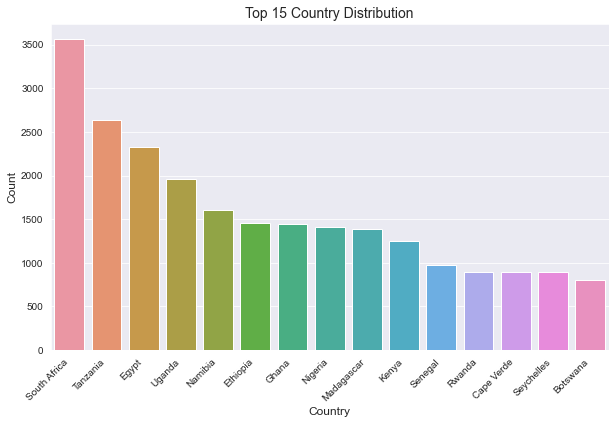

In [49]:
# Countplot of country distribution
country_counts = df['country'].value_counts().sort_values(ascending=False)
top_10_countries = country_counts.head(15)  # Select top 10 countries

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))  # Set the figure size
ax = sns.barplot(x=top_10_countries.index, y=top_10_countries.values)

ax.set_xlabel('Country', fontsize=12)  # Set x-axis label and fontsize
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate tick labels
ax.set_ylabel('Count', fontsize=12)  # Set y-axis label and fontsize
ax.set_title('Top 15 Country Distribution', fontsize=14)  # Set plot title

plt.show()

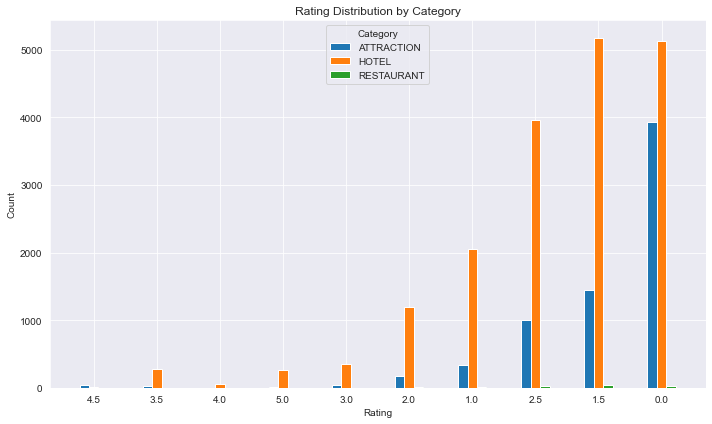

In [50]:
#visualizing ratings per tourist destination category 
# Group the ratings by category
grouped_data = df.groupby('type')['rating'].value_counts().unstack()
# Get unique categories and ratings
categories = df['type'].unique()
ratings = df['rating'].unique()
# Set the width of each bar
bar_width = 0.15
# Calculate the x position for each group of bars
x = np.arange(len(ratings))
# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the bars for each category within each rating
for i, category in enumerate(categories):
    ax.bar(x + (i * bar_width), grouped_data.loc[category], width=bar_width, label=category)
    # Set the x-axis labels and ticks
    ax.set_xticks(x + ((len(categories) - 1) * bar_width) / 2)
    ax.set_xticklabels(ratings)
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')
    ax.set_title('Rating Distribution by Category')
    ax.legend(title='Category')
# Adjust the layout
plt.tight_layout()
# Show the plot
plt.show()

* From the chart above it can be seen that `hotel` category had higher ratings with an average rate of `4.0` followed by `attraction` while restaurants had lowest ratings based on categories over `3.5` 
* Despite having good ratings the same categories were rated poorly hith `hotel` and `attraction` trailing with rates of `1.5, 1.0` and `2.0` respectively. 

<function matplotlib.pyplot.show(close=None, block=None)>

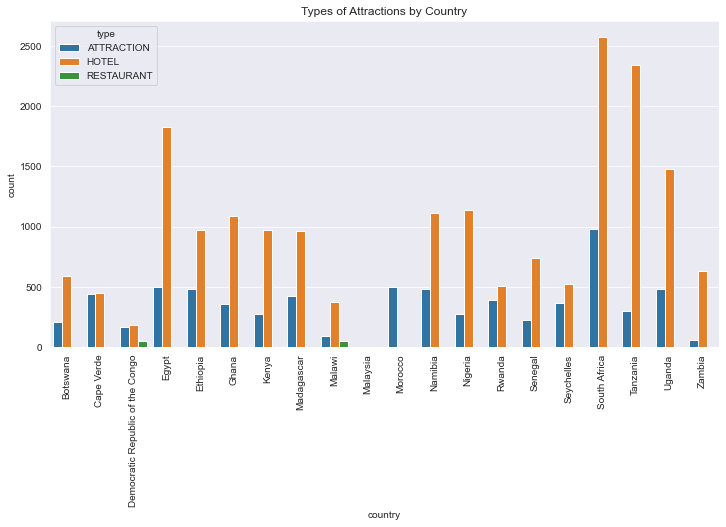

In [51]:
attractions_count = df.groupby(['country', 'type']).size().reset_index(name='count')

# Plot the count of attractions by country and category
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='count', hue='type', data=attractions_count)
# rotate x-axis labels
plt.xticks(rotation=90)
plt.title('Types of Attractions by Country')
plt.show

In [52]:
df

id        type         subcategories                    name  \
0       1171922  ATTRACTION  [Sights & Landmarks]      Khwai River Bridge   
1       2513264  ATTRACTION      [Nature & Parks]   Gaborone Game Reserve   
2       3247057  ATTRACTION  [Sights & Landmarks]         ISKCON Gaborone   
3        478934  ATTRACTION      [Nature & Parks]       Serondela Reserve   
4       7931216  ATTRACTION      [Nature & Parks]     Khutse Game Reserve   
...         ...         ...                   ...                     ...   
35357  11924285       HOTEL   [Bed and Breakfast]            Kupark Lodge   
35360  10311379       HOTEL   [Specialty Lodging]  Muzala Corporate Lodge   
35361  11955339       HOTEL   [Bed and Breakfast]        Fresh View Hotel   
35363   8695971       HOTEL   [Specialty Lodging]    Zambezi Ultima Lodge   
35365  23874822       HOTEL               [Hotel]    Golden Sonnets Hotel   

       rating   latitude  longitude  numberOfReviews  \
0         4.5 -24.652970  25.898460               45   
1         3.5 -24.652970  25.898460              115   
2         4.5 -24.652970  25.898460               23   
3         4.5 -23.427362  26.350575               34   
4         4.0 -22.201755  26.802690               29   
...       ...        ...        ...              ...   
35357     1.0 -15.588960  28.271020                1   
35360     1.0 -15.375338  28.331383                2   
35361     2.0 -16.538395  28.699066               14   
35363     2.5 -17.839890  25.860800                2   
35365     1.5 -14.428506  28.451357                2   

                                               amenities    LowerPrice  \
0                                              bathroom     141.000000   
1                                              bathroom     141.000000   
2                                              bathroom     141.000000   
3                                              bathroom     141.000000   
4                                              bathroom     141.000000   
...                                                  ...           ...   
35357  [Kids Activities, Restaurant, Bar/Lounge, Hot ...  13777.392428   
35360  [Kids Activities, Shuttle Bus Service, Room se...  11955.000000   
35361  [Restaurant, Air conditioning, Pool, Kids Acti...  13777.392428   
35363  [Kids Activities, Laundry Service, Air conditi...  13777.392428   
35365                       [restaurant, bathroom, room]  13777.392428   

         UpperPrice        RankingType             Location  Numerator  \
0        281.000000       things to do       Okavango Delta          3   
1        281.000000       things to do             Gaborone          7   
2        281.000000       things to do             Gaborone          5   
3        281.000000       things to do  Chobe National Park          3   
4        281.000000       things to do             Gaborone          8   
...             ...                ...                  ...        ...   
35357  23045.636246        B&Bs / Inns                Kafue          1   
35360  13221.000000  Specialty lodging               Lusaka         65   
35361  23045.636246  Specialty lodging             Siavonga          4   
35363  23045.636246  Specialty lodging          Livingstone         65   
35365  23045.636246             hotels                Kabwe          3   

       Denominator   country  
0                5  Botswana  
1               25  Botswana  
2               25  Botswana  
3                8  Botswana  
4               25  Botswana  
...            ...       ...  
35357            1    Zambia  
35360          156    Zambia  
35361            9    Zambia  
35363          106    Zambia  
35365            7    Zambia  

[25627 rows x 16 columns]

The columns `numerator` and `denomintor` are features that capture how popular a particular destination is in its `Location`. We can extract some information `regional_rating` by combining `numerator` and `denominator`

> **Some feature engineering** on above mentioned cols

In [53]:
# New feature we calculate the reciprocal since the Numerator/Denominator would result in lower ranked places
# getting higher values
df['regional_rating'] = (df['Denominator']/df['Numerator']).astype(float)
# Drop num and denom
df.drop(['Numerator', 'Denominator'], axis=1, inplace=True)
df.head()

id        type         subcategories                   name  rating  \
0  1171922  ATTRACTION  [Sights & Landmarks]     Khwai River Bridge     4.5   
1  2513264  ATTRACTION      [Nature & Parks]  Gaborone Game Reserve     3.5   
2  3247057  ATTRACTION  [Sights & Landmarks]        ISKCON Gaborone     4.5   
3   478934  ATTRACTION      [Nature & Parks]      Serondela Reserve     4.5   
4  7931216  ATTRACTION      [Nature & Parks]    Khutse Game Reserve     4.0   

    latitude  longitude  numberOfReviews  amenities  LowerPrice  UpperPrice  \
0 -24.652970  25.898460               45  bathroom        141.0       281.0   
1 -24.652970  25.898460              115  bathroom        141.0       281.0   
2 -24.652970  25.898460               23  bathroom        141.0       281.0   
3 -23.427362  26.350575               34  bathroom        141.0       281.0   
4 -22.201755  26.802690               29  bathroom        141.0       281.0   

    RankingType             Location   country  regional_rating  
0  things to do       Okavango Delta  Botswana         1.666667  
1  things to do             Gaborone  Botswana         3.571429  
2  things to do             Gaborone  Botswana         5.000000  
3  things to do  Chobe National Park  Botswana         2.666667  
4  things to do             Gaborone  Botswana         3.125000

In [54]:
#print current df
df

id        type         subcategories                    name  \
0       1171922  ATTRACTION  [Sights & Landmarks]      Khwai River Bridge   
1       2513264  ATTRACTION      [Nature & Parks]   Gaborone Game Reserve   
2       3247057  ATTRACTION  [Sights & Landmarks]         ISKCON Gaborone   
3        478934  ATTRACTION      [Nature & Parks]       Serondela Reserve   
4       7931216  ATTRACTION      [Nature & Parks]     Khutse Game Reserve   
...         ...         ...                   ...                     ...   
35357  11924285       HOTEL   [Bed and Breakfast]            Kupark Lodge   
35360  10311379       HOTEL   [Specialty Lodging]  Muzala Corporate Lodge   
35361  11955339       HOTEL   [Bed and Breakfast]        Fresh View Hotel   
35363   8695971       HOTEL   [Specialty Lodging]    Zambezi Ultima Lodge   
35365  23874822       HOTEL               [Hotel]    Golden Sonnets Hotel   

       rating   latitude  longitude  numberOfReviews  \
0         4.5 -24.652970  25.898460               45   
1         3.5 -24.652970  25.898460              115   
2         4.5 -24.652970  25.898460               23   
3         4.5 -23.427362  26.350575               34   
4         4.0 -22.201755  26.802690               29   
...       ...        ...        ...              ...   
35357     1.0 -15.588960  28.271020                1   
35360     1.0 -15.375338  28.331383                2   
35361     2.0 -16.538395  28.699066               14   
35363     2.5 -17.839890  25.860800                2   
35365     1.5 -14.428506  28.451357                2   

                                               amenities    LowerPrice  \
0                                              bathroom     141.000000   
1                                              bathroom     141.000000   
2                                              bathroom     141.000000   
3                                              bathroom     141.000000   
4                                              bathroom     141.000000   
...                                                  ...           ...   
35357  [Kids Activities, Restaurant, Bar/Lounge, Hot ...  13777.392428   
35360  [Kids Activities, Shuttle Bus Service, Room se...  11955.000000   
35361  [Restaurant, Air conditioning, Pool, Kids Acti...  13777.392428   
35363  [Kids Activities, Laundry Service, Air conditi...  13777.392428   
35365                       [restaurant, bathroom, room]  13777.392428   

         UpperPrice        RankingType             Location   country  \
0        281.000000       things to do       Okavango Delta  Botswana   
1        281.000000       things to do             Gaborone  Botswana   
2        281.000000       things to do             Gaborone  Botswana   
3        281.000000       things to do  Chobe National Park  Botswana   
4        281.000000       things to do             Gaborone  Botswana   
...             ...                ...                  ...       ...   
35357  23045.636246        B&Bs / Inns                Kafue    Zambia   
35360  13221.000000  Specialty lodging               Lusaka    Zambia   
35361  23045.636246  Specialty lodging             Siavonga    Zambia   
35363  23045.636246  Specialty lodging          Livingstone    Zambia   
35365  23045.636246             hotels                Kabwe    Zambia   

       regional_rating  
0             1.666667  
1             3.571429  
2             5.000000  
3             2.666667  
4             3.125000  
...                ...  
35357         1.000000  
35360         2.400000  
35361         2.250000  
35363         1.630769  
35365         2.333333  

[25627 rows x 15 columns]

#### Visualizing  of top `Locations` per country

  Lets get a better sense of `Location`s per country.

In [55]:
# How many locations per country
#list to hold top 5 locations and their counts for each country
top_5_locs_per_country = []
# for loop over top 10 countries
for country in top_10_countries.index:
    country_df = df.loc[df['country']==country].groupby(['Location'])['id'].count().sort_values(ascending=False)[:5]
    curr_top_5_locs = list(country_df.index)
    top_5_value_counts = list(country_df.values)
    top_5_dict = dict(zip(curr_top_5_locs, top_5_value_counts))
    top_5_locs_per_country.append({country: top_5_dict})
    

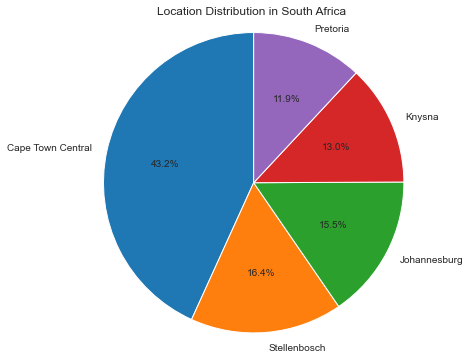

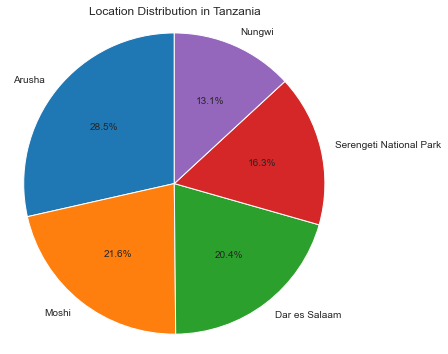

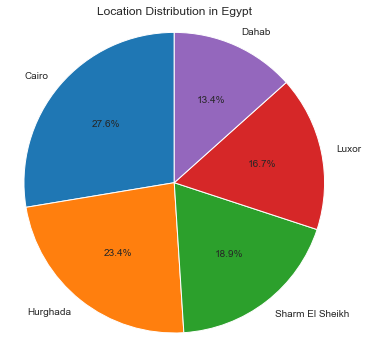

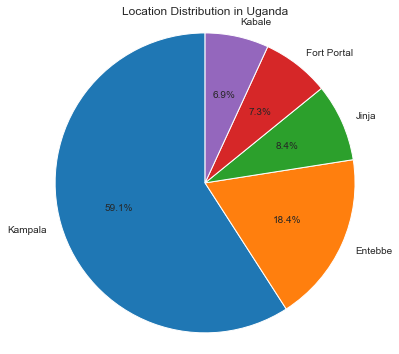

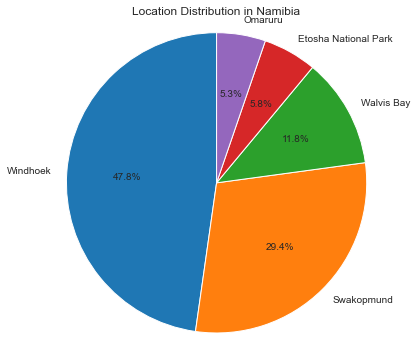

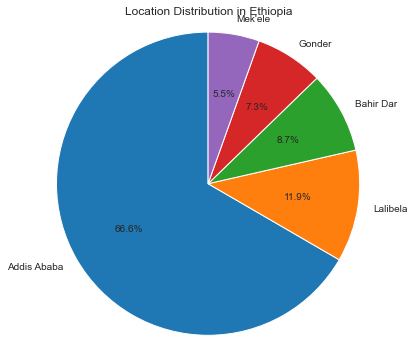

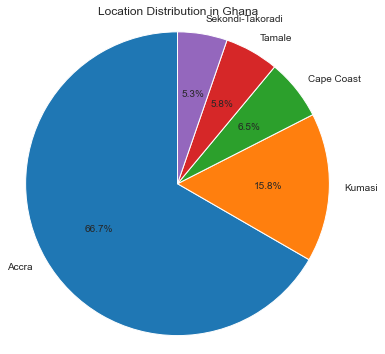

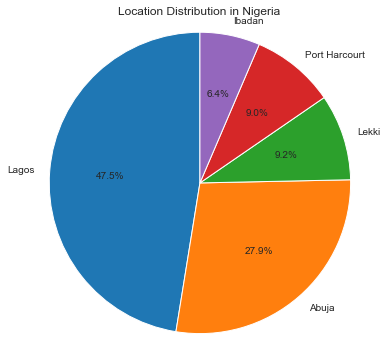

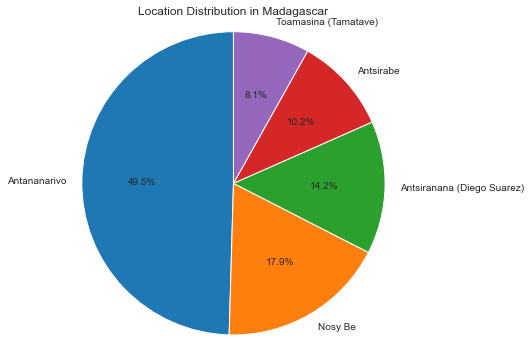

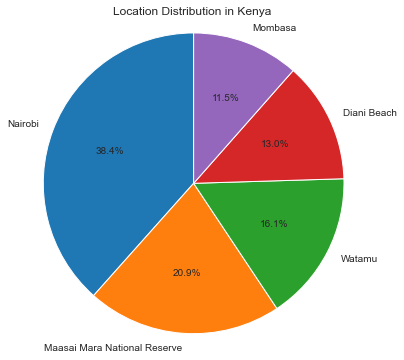

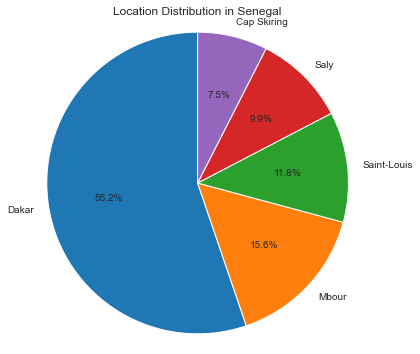

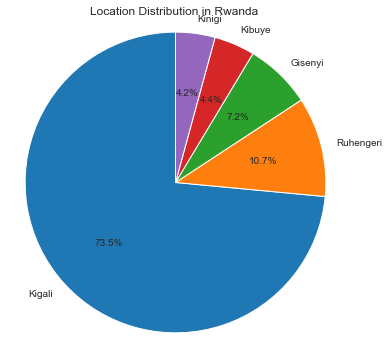

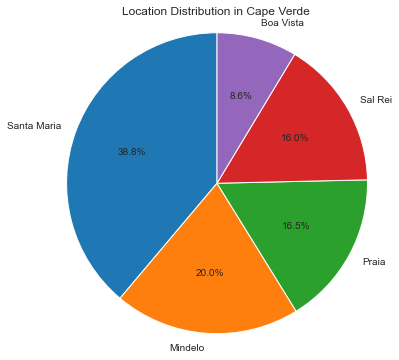

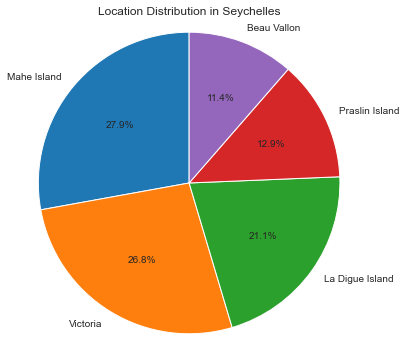

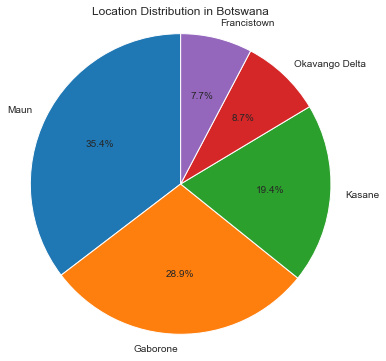

In [56]:

# Loop over the list of dictionaries
for d in top_5_locs_per_country:
    # Get the country name and locations dictionary
    country, locations = list(d.items())[0]
    
    # Get the counts and labels for the pie chart
    counts = list(locations.values())
    labels = list(locations.keys())

    # Create the pie chart
    plt.figure(figsize=(6,6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'Location Distribution in {country}')
    plt.axis('equal')
    sns.despine(left=True, bottom=True)
    plt.show()

In [57]:
#current df
df

id        type         subcategories                    name  \
0       1171922  ATTRACTION  [Sights & Landmarks]      Khwai River Bridge   
1       2513264  ATTRACTION      [Nature & Parks]   Gaborone Game Reserve   
2       3247057  ATTRACTION  [Sights & Landmarks]         ISKCON Gaborone   
3        478934  ATTRACTION      [Nature & Parks]       Serondela Reserve   
4       7931216  ATTRACTION      [Nature & Parks]     Khutse Game Reserve   
...         ...         ...                   ...                     ...   
35357  11924285       HOTEL   [Bed and Breakfast]            Kupark Lodge   
35360  10311379       HOTEL   [Specialty Lodging]  Muzala Corporate Lodge   
35361  11955339       HOTEL   [Bed and Breakfast]        Fresh View Hotel   
35363   8695971       HOTEL   [Specialty Lodging]    Zambezi Ultima Lodge   
35365  23874822       HOTEL               [Hotel]    Golden Sonnets Hotel   

       rating   latitude  longitude  numberOfReviews  \
0         4.5 -24.652970  25.898460               45   
1         3.5 -24.652970  25.898460              115   
2         4.5 -24.652970  25.898460               23   
3         4.5 -23.427362  26.350575               34   
4         4.0 -22.201755  26.802690               29   
...       ...        ...        ...              ...   
35357     1.0 -15.588960  28.271020                1   
35360     1.0 -15.375338  28.331383                2   
35361     2.0 -16.538395  28.699066               14   
35363     2.5 -17.839890  25.860800                2   
35365     1.5 -14.428506  28.451357                2   

                                               amenities    LowerPrice  \
0                                              bathroom     141.000000   
1                                              bathroom     141.000000   
2                                              bathroom     141.000000   
3                                              bathroom     141.000000   
4                                              bathroom     141.000000   
...                                                  ...           ...   
35357  [Kids Activities, Restaurant, Bar/Lounge, Hot ...  13777.392428   
35360  [Kids Activities, Shuttle Bus Service, Room se...  11955.000000   
35361  [Restaurant, Air conditioning, Pool, Kids Acti...  13777.392428   
35363  [Kids Activities, Laundry Service, Air conditi...  13777.392428   
35365                       [restaurant, bathroom, room]  13777.392428   

         UpperPrice        RankingType             Location   country  \
0        281.000000       things to do       Okavango Delta  Botswana   
1        281.000000       things to do             Gaborone  Botswana   
2        281.000000       things to do             Gaborone  Botswana   
3        281.000000       things to do  Chobe National Park  Botswana   
4        281.000000       things to do             Gaborone  Botswana   
...             ...                ...                  ...       ...   
35357  23045.636246        B&Bs / Inns                Kafue    Zambia   
35360  13221.000000  Specialty lodging               Lusaka    Zambia   
35361  23045.636246  Specialty lodging             Siavonga    Zambia   
35363  23045.636246  Specialty lodging          Livingstone    Zambia   
35365  23045.636246             hotels                Kabwe    Zambia   

       regional_rating  
0             1.666667  
1             3.571429  
2             5.000000  
3             2.666667  
4             3.125000  
...                ...  
35357         1.000000  
35360         2.400000  
35361         2.250000  
35363         1.630769  
35365         2.333333  

[25627 rows x 15 columns]

In [58]:
#loading 'clean_data' into df
clean_df = pd.read_csv('Data/clean_data.csv')

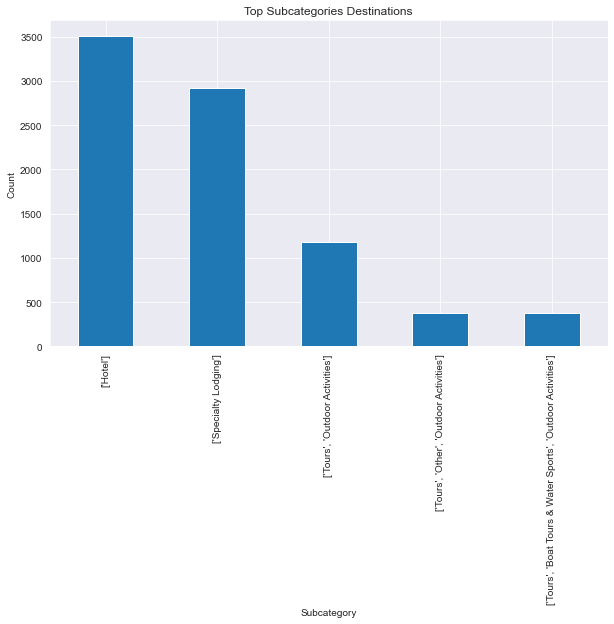

In [59]:
# Get value counts of production companies
subcategory_counts = clean_df['subcategories'].value_counts()

# Select the top 5 production companies
top_subcategories = subcategory_counts[1:6]

# Plot the top production companies
plt.figure(figsize=(10, 6))
top_subcategories.plot(kind='bar')
plt.title('Top Subcategories Destinations')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.savefig('Data/images/top_subcategories')
plt.show()

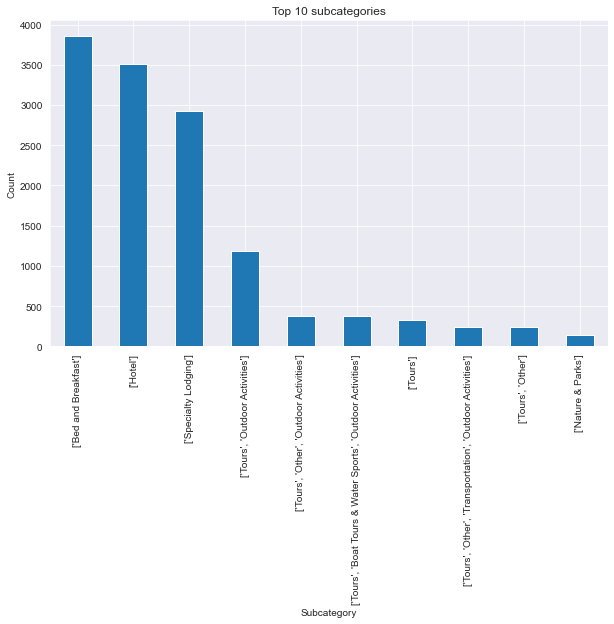

In [60]:
# Plotting 'Subcategoris' (top 10)
plt.figure(figsize=(10, 6))
top_10_subcategories = clean_df['subcategories'].explode().value_counts().head(10)
top_10_subcategories.plot(kind='bar')
plt.title('Top 10 subcategories')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.savefig('Data/images/top_10_subcategories_individually.png')
plt.show()

Columns to plot: Index(['id', 'rating', 'latitude', 'longitude', 'numberOfReviews',
       'LowerPrice', 'UpperPrice', 'Rank'],
      dtype='object')


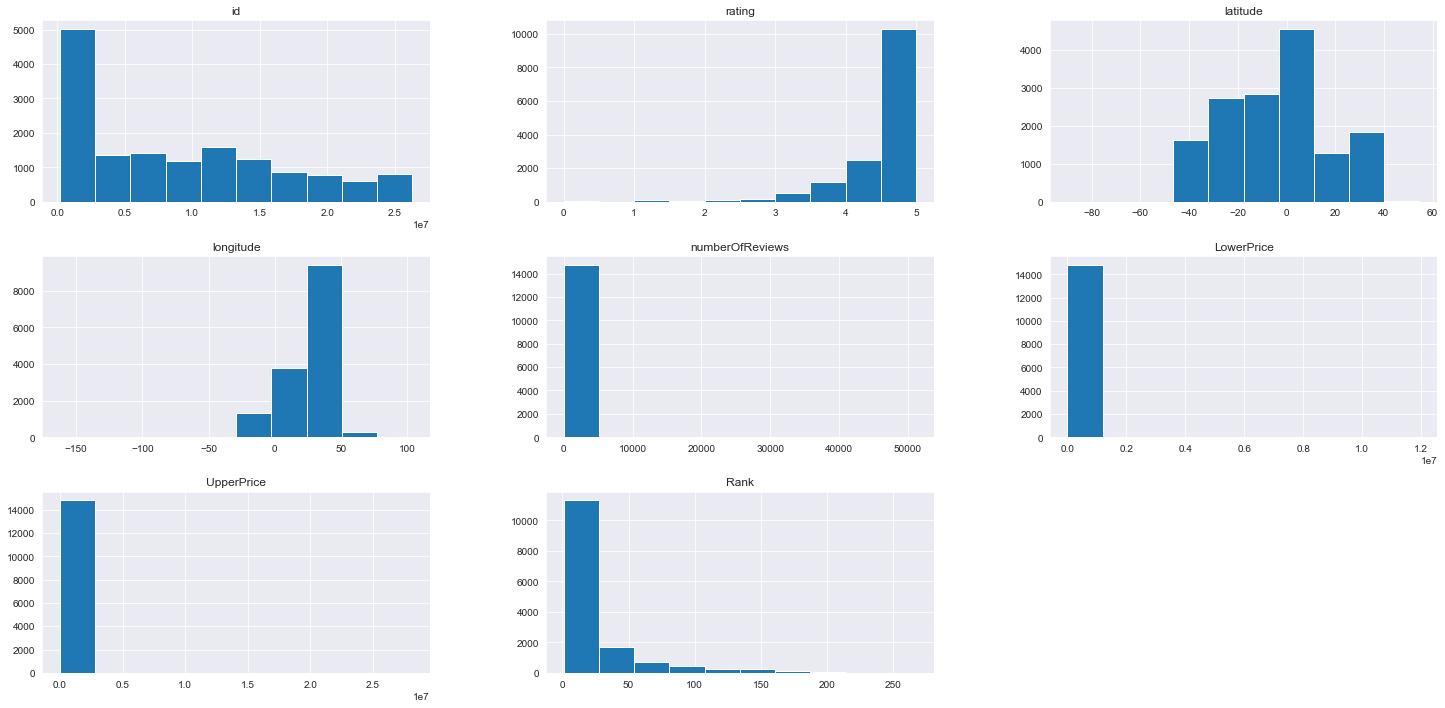

In [61]:
# Histogram plots for each data
# Select the numerical variables to plot
num_cols_to_plot = clean_df.select_dtypes(include=['int64', 'float64']).columns.drop([])
print("Columns to plot:",num_cols_to_plot )
# Create a histogram for each variable
clean_df[num_cols_to_plot].hist(figsize=(25, 12))
plt.savefig('Data/images/Columnstoplot')
plt.show()

In [62]:
# Define the map layout
layout = go.Layout(
    title='Places to visit by Location',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        style='stamen-terrain',
        bearing=0,
        center=dict(
            lat=clean_df['latitude'].median(),
            lon=clean_df['longitude'].median()
        ),
        pitch=0,
        zoom=10
    ),
)

# Define the map data as a scatter plot of the coordinates
data = go.Scattermapbox(
    lat=clean_df['latitude'],
    lon=clean_df['longitude'],
    mode='markers',
    marker=dict(
        size=5,
        color=clean_df['rating'],
        opacity=0.8
    ),
    text=['Price: ${}'.format(i) for i in clean_df['UpperPrice']],
    hovertext = clean_df.apply(lambda x: f"Ranking Type: ${x['RankingType']}, Location: {x['locationString']}", axis=1),
)

# Create the map figure and show it
fig = go.Figure(data=[data], layout=layout)
plt.savefig('Data/images/map')
fig.show()

<Figure size 432x288 with 0 Axes>

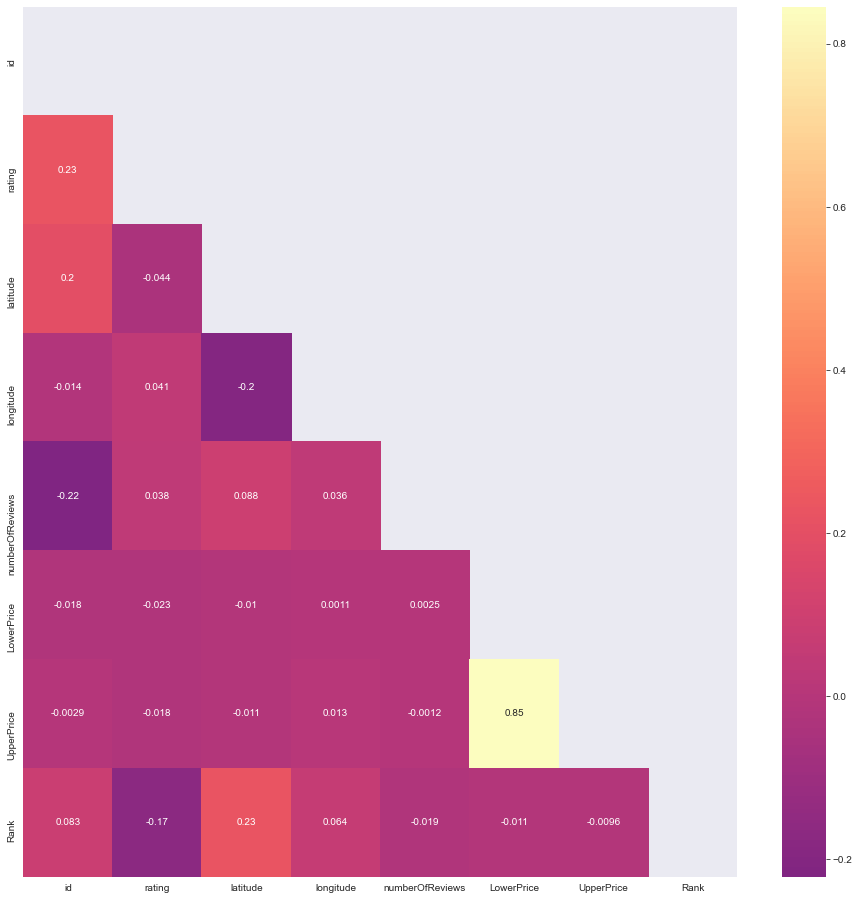

<Figure size 432x288 with 0 Axes>

In [63]:
## Multicollinearity

# Create a correlation matrix
corr_matrix = clean_df.corr()
# Create a fig size
plt.figure(figsize=(16, 16))
# Create a mask to show only the lower triangle
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Plot the heatmap with the lower triangle mask applied
sns.heatmap(corr_matrix, mask=mask, cmap='magma', center=0, annot=True)
# Show the plot
plt.show();
# Save figure
plt.savefig('Data/images/multicollinearity.png')

## Modelling

Step 1: Prepare the data

Load the sample data into a suitable data structure, such as a pandas DataFrame.
Preprocess the data if necessary, including handling missing values, converting categorical variables to numerical representations, and normalizing numerical features.
Step 2: Split the data

Split the data into training and testing sets. Typically, an 80-20 split is used, but you can adjust the ratio based on the size of your dataset.
Step 3: Choose recommendation models

There are several recommendation models you can choose from, depending on the nature of your data and the problem you want to solve. Here are a few popular models:
Collaborative Filtering: This approach recommends items based on users' past behavior and preferences.
Content-Based Filtering: This approach recommends items based on the similarity between items' characteristics and users' preferences.
Matrix Factorization: This approach decomposes the user-item rating matrix to find latent factors and make recommendations.
Neural Networks: You can also use deep learning models like neural networks for recommendation tasks.
Step 4: Train and evaluate the models

For each model you choose, train it using the training set.
Evaluate the trained model's performance using appropriate evaluation metrics such as precision, recall, or Mean Average Precision (MAP).
Repeat the training and evaluation process for each model.

Step 5: Choose the best model

Compare the performance of the different models based on the evaluation metrics.
Select the model that performs best according to your evaluation criteria.

Step 6: Fine-tune and optimize the chosen model

Once you have selected the best model, you can further fine-tune and optimize its hyperparameters using techniques like cross-validation or grid search.

Step 7: Deploy the recommendation system

Once you are satisfied with the performance of your chosen and optimized model, you can deploy it to make real-time recommendations.

In [134]:
# Load the data into Surprise Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(clean_df[['id', 'rating', 'Rank']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Train the model
model = KNNBasic(random_state=42)
model.fit(trainset)

# Evaluate the model
predictions = model.test(testset)
accuracy = accuracy.rmse(predictions)

In [64]:
unique_ranking_types = clean_df['RankingType'].unique()

for ranking_type in unique_ranking_types:
    subset = clean_df[clean_df['RankingType'] == ranking_type]
    normalized_rankings = (subset['Rank'] - subset['Rank'].min()) / (subset['Rank'].max() - subset['Rank'].min())
    clean_df.loc[clean_df['RankingType'] == ranking_type, 'Rank'] = normalized_rankings

In [70]:
model_data = reviews[['userId', 'locationId', 'rating']]

# Load the data into Surprise Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(model_data[['userId', 'locationId', 'rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Train the model
model = SVD(random_state=42)
model.fit(trainset)

# Evaluate the model
predictions = model.test(testset)
accuracy = accuracy.rmse(predictions)

KeyError: "['userId'] not in index"

The RMSE (Root Mean Squared Error) value of 0.7377 indicates the average prediction error of the model on the test set. A lower RMSE value indicates better accuracy of the model's predictions.

In the context of collaborative filtering recommendation systems, the RMSE represents how well the model is able to predict user ratings for items. A lower RMSE implies that the model is better at predicting user preferences and provides more accurate recommendations.

RMSE of 0.7377 suggests that the model has reasonably good predictive performance. as can be observed below.

In [ ]:
for prediction in predictions:
    print(f"Predicted rating: {prediction.est:.2f}")
    print(f"Actual rating: {prediction.r_ui:.2f}")
    print("---")

In the code below, we will iterate over the predictions and increment the corresponding counters based on the predicted ratings and actual ratings. Then, we calculate precision by dividing the number of true positives by the sum of true positives and false positives. Recall is calculated by dividing the number of true positives by the sum of true positives and false negatives.

Note that this calculation assumes a binary classification problem where ratings above the threshold are considered positive and ratings below the threshold are considered negative. 

In [ ]:
threshold = 4  # Define the threshold for positive predictions

true_positives = 0
false_positives = 0
false_negatives = 0

for prediction in predictions:
    if prediction.est >= threshold:
        if prediction.r_ui >= threshold:
            true_positives += 1
        else:
            false_positives += 1
    elif prediction.r_ui >= threshold:
        false_negatives += 1

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


NameError: name 'predictions' is not defined

## Model Evaluation

## Tuning

## Deployment

## Conclusion and Recommendations